# Business Case Study: Audiobook app

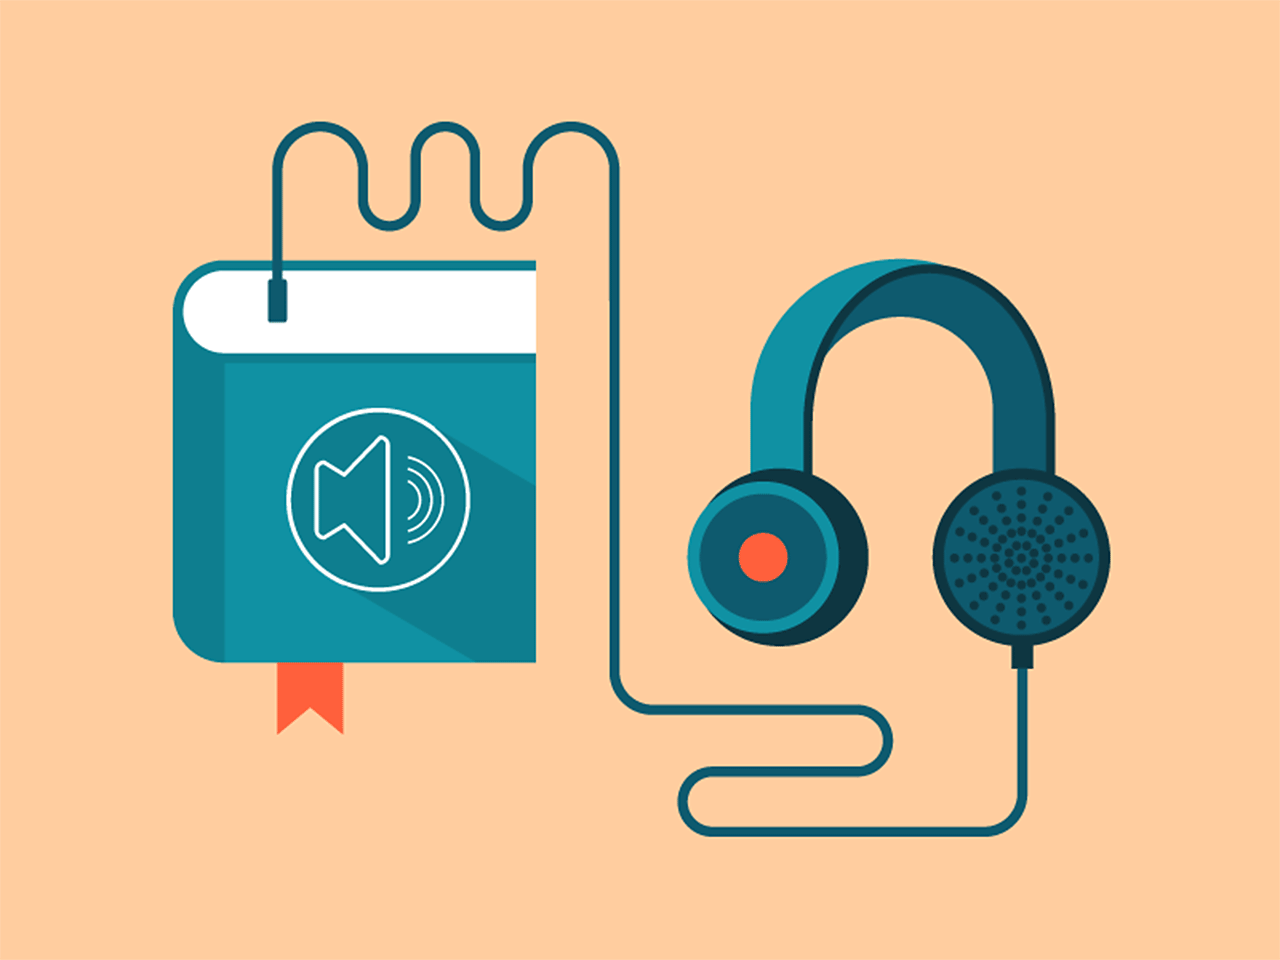

You are given data from an Audiobook app. Logically, it relates only to the audio versions of books.  We want to create a machine learning model based on our available data that can predict if a customer will buy again from the Audiobook company.

- The data is from an audiobook app, each customer in the database has make a purchase at least once.
- The main idea is that the company shouldn't spend there money targeting individuals who are unlikely to come back.
- If we focus on client who are more likely to convert again we'll get increase the sales and profitability figures.

The model must show us which are the most important metrics for a client to come back.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)
pd.set_option("display.float_format", "{:.2f}".format)

In [ ]:
data = pd.read_csv("/kaggle/input/audiobook-app-data/audiobook_data_2.csv", index_col=0)
data.head()

# 1. Getting aquainted with the dataset

- `ÌD`: is like a name.

- `Book_length(mins)_overall`: is the sum of the lengths of purchases.

- `Book_length(mins)_avg`: is the sum of the lengths of purchases divided by the number of purchases. Notice we don't need the number of purchases column because we ca get it from `Book_length(mins)_overall` / `Book_length(mins)_avg`.

- `Price_overall` & `Price_avg`: Same as Book length, the price variable is almost always a good predictor.

- `Review`: is boolean. It shows if the customer left a review. If so, `Review10/10` saves the review left by the user. While most users don't left a review we fill the missing reviews by avrage review column.

- `Minutes_listened`: is a measure of engagement, the total of minutes the user listen to audiobooks.

- `Completion`: is the `Minutes_listened` / `Book_length(mins)_overall`.

- `Support_Request`: Shows the total number of support request (forgotten password to assistance).

- `Last_Visited_mins_Purchase_date`: the bigger the difference, the bigger sooner the engagement. If the value is 0, we are sure the customer has never accessed what he/she has bought.

The data was gathered from the audiobook app, the input data represents `2 years` worth of engagement. We are doing supervised learning so we need `target`. We took extra `6 month` to check if the user converted or not. 1 if the customer buys in the next 6 months, 0 if the customer didn't.

- `target`: 1 if the customer bought again in the last 6 months of data. 0 if the customer did not buy again.

# 2. Exploratory Data Analysis

In [ ]:
data.describe()

In [ ]:
data.isnull().sum()

In [ ]:
data.info()

## `Book_length(mins)_overall` & `Book_length(mins)_avg`

- `Book_length(mins)_overall`: is the sum of the lengths of purchases.

- `Book_length(mins)_avg`: is the sum of the lengths of purchases divided by the number of purchases. Notice we don't need the number of purchases column because we ca get it from `Book_length(mins)_overall` / `Book_length(mins)_avg`.

In [ ]:
data['Book_length(mins)_overall'].value_counts()

In [ ]:
def book_length(length):
    if length > 1200:
        return 1
    else:
        return 0
    
data['purchases_hour_>3h'] = data['Book_length(mins)_overall'].apply(book_length)

In [ ]:
data['Book_length(mins)_avg'].apply(book_length).value_counts()

In [ ]:
data['purchases_hour_>3h'].value_counts()

In [ ]:
columns = ['purchases_hour_>3h', 'Book_length(mins)_overall', 'Book_length(mins)_avg']
plt.figure(figsize=(12, 7))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    data[data["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    data[data["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

## `Price_overall` & `Price_avg`

- `Price_overall` & `Price_avg`: Same as Book length, the price variable is almost always a good predictor.

In [ ]:
columns = ["Price_overall", "Price_avg"]
plt.figure(figsize=(12, 7))
df = data[(data.Price_overall < 20) & (data.Price_avg < 20)]

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    df[df["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    df[df["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

## `Review` & `Review10/10`
- `Review`: is boolean. It shows if the customer left a review. If so, `Review10/10` saves the review left by the user. While most users don't left a review we fill the missing reviews by avrage review column.

In [ ]:
print(data[data['Review'] == 0].Target.value_counts(normalize=True))
print(data[data['Review'] == 1].Target.value_counts(normalize=True))

In [ ]:
data['Review10/10'].value_counts()

In [ ]:
columns = ["Review", "Review10/10"]
plt.figure(figsize=(12, 7))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    data[data["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    data[data["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

## `Minutes_listened` & `Completion`
- `Minutes_listened`: is a measure of engagement, the total of minutes the user listen to audiobooks.
- `Completion`: is the `Minutes_listened` / `Book_length(mins)_overall`.

In [ ]:
def listened_to_books(minutes):
    if minutes > 0.0:
        return 0
    else:
        return 1
data['listened_to_books'] = data.Minutes_listened.apply(listened_to_books)

In [ ]:
def completion_state(minutes):
    if minutes > 0.5:
        return 1
    else:
        return 0
data['completion_state'] = data.Completion.apply(completion_state)

In [ ]:
columns = ["Minutes_listened", "Completion", "listened_to_books", "completion_state"]
plt.figure(figsize=(12, 7))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    data[data["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    data[data["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [ ]:
data.drop('Minutes_listened', axis=1, inplace=True)

## `Support_Request` & `Last_Visited_mins_Purchase_date`

- `Support_Request`: Shows the total number of support request (forgotten password to assistance).
- `Last_Visited_mins_Purchase_date`: the bigger the difference, the bigger sooner the engagement. If the value is 0, we are sure the customer has never accessed what he/she has bought.

In [ ]:
def asked_for_request(request):
    if request == 0:
        return 0
    else:
        return 1
    
data["asked_for_request"] = data.Support_Request.apply(asked_for_request)

In [ ]:
def acc_purchases(purchase):
    if purchase == 0:
        return 0
    else:
        return 1
data['acc_purchases'] = data.Last_Visited_mins_Purchase_date.apply(acc_purchases)

In [ ]:
data.Last_Visited_mins_Purchase_date.value_counts()

In [ ]:
columns = ["Support_Request", "Last_Visited_mins_Purchase_date", "asked_for_request", "acc_purchases"]
plt.figure(figsize=(12, 7))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    data[data["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    data[data["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [ ]:
data.drop('Support_Request', axis=1, inplace=True)

In [ ]:
print(f"{data.Target.value_counts()}")
print(f"{data.Target.value_counts()[0] / data.Target.value_counts()[1]}")

It is important to notice that our `target` variable is inbabalanced. We have only `2237` user who convert again in the `6 month` period. The data need to be balanced.

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)

# 3. Data Pre-processing

Since we are dealing with real life data, we will need to preprocess it a bit. This is the relevant code which is not that hard but refers to data engineering more than machine learning.

- Handling categorical features

- Balance the dataset. 

### Check Duplicate columns and Rows

In [ ]:
print(f"Data shape before removing duplicates: {data.shape}")

# Remove duplicate Features
data = data.T.drop_duplicates()
data = data.T

# Remove Duplicate Rows
data.drop_duplicates(inplace=True)

print(f"Data shape after removing duplicates: {data.shape}")

In [ ]:
print(f"{data.Target.value_counts()}")
print(f"{data.Target.value_counts()[0] / data.Target.value_counts()[1]}")

### Handling categorical features

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

X = data.drop('Target', axis=1)
y = data.Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dummies = [column for column in data.drop('Target', axis=1).columns if data[column].nunique() <= 10]
numeric = [column for column in data.drop('Target', axis=1).columns if data[column].nunique() > 10]

ohe = OneHotEncoder()
std_scaler = StandardScaler()

ct = make_column_transformer(
    (ohe, dummies),
    (std_scaler, numeric),
    remainder='passthrough'
)

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")
    

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    
def plot_graphs(model):    
    precisions, recalls, thresholds = precision_recall_curve(y_test, model.predict(X_test))
    plt.figure(figsize=(14, 25))
    plt.subplot(4, 2, 1)
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

    plt.subplot(4, 2, 2)
    plt.plot(precisions, recalls)
    plt.xlabel("Precision")
    plt.ylabel("Recall")
    plt.title("PR Curve: precisions/recalls tradeoff");

    plt.subplot(4, 2, 3)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
    plot_roc_curve(fpr, tpr)

# 4. Model Building

# 4. 1. Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear', penalty='l2')
lr_clf.fit(X_train, y_train)

evaluate(lr_clf, X_train, X_test, y_train, y_test)

### Cross Validation Score for Logistic Regression

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_clf, X, y, cv=5, scoring='f1')
print(f"Logistic Regression F1_score: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

In [ ]:
plot_graphs(lr_clf)

In [ ]:
scores_dict = {
    'Logistic Regression': {
        'Train': accuracy_score(y_train, lr_clf.predict(X_train)),
        'Test': accuracy_score(y_test, lr_clf.predict(X_test)),
        'cv_f1_score': scores.mean()
    },
}

# 4. 2. Random Forest Classifier

In [ ]:
zeros = (y_train.value_counts()[0] / y_train.shape)[0]
ones = (y_train.value_counts()[1] / y_train.shape)[0]

print(f"Doesn't purchase again users Rate: {zeros * 100:.2f}%")
print(f"Purchase again users Rate: {ones * 100 :.2f}%")

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=1500, oob_score=True)
rf_clf.fit(X_train, y_train)

evaluate(rf_clf, X_train, X_test, y_train, y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(n_estimators=100, oob_score=True)

param_grid = {'n_estimators':[100, 500, 1000, 1500],
              'max_depth':[3, 5, 7, 10, 15, None], 
              'min_samples_split':[2, 3, 10], 
              'min_samples_leaf':[1, 3, 5, 7, 10], 
              'criterion':["gini", "entropy"]}

rf_cv = GridSearchCV(rf_clf, param_grid, scoring="f1", n_jobs=-1, verbose=1, cv=3)
rf_cv.fit(X_train, y_train)

best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

evaluate(rf_clf, X_train, X_test, y_train, y_test)

### Cross Validation Score for Random Forest Classifier

In [ ]:
scores = cross_val_score(rf_clf, X, y, cv=5, scoring='f1')
print(scores)
print(f"Random Forest F1_score: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

In [ ]:
plot_graphs(rf_clf)

In [ ]:
scores_dict['Random Forest'] = {
    'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
    'Test': accuracy_score(y_test, rf_clf.predict(X_test)),
    'cv_f1_score': scores.mean()
}

# 4. 3. XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(learning_rate=0.5, 
                        n_estimators=150, 
                        base_score=0.3)
xgb_clf.fit(X_train, y_train)

evaluate(xgb_clf, X_train, X_test, y_train, y_test)

In [ ]:
xgb_clf = XGBClassifier(learning_rate=0.5, 
                        n_estimators=150, 
                        base_score=0.3)

hyperparameter_grid = {'colsample_bytree': [ 0.5, 0.75, 0.85, 0.9, 1], 
                       'colsample_bylevel': [ 0.5, 0.75, 0.85, 0.9, 1],
                       'colsample_bynode': [ 0.5, 0.75, 0.85, 0.9, 1],
#                        'learning_rate' : [0.01, 0.5, 0.1], 
#                        'n_estimators': [100, 350, 500],
                       'min_child_weight' : [2, 3, 5, 10],
                       'max_depth': [3, 5, 10, 15], 
#                        'base_score' : [0.1, 0.5, 0.9]
                      }

xgb_cv = GridSearchCV(xgb_clf, hyperparameter_grid, scoring="f1", 
                           n_jobs=-1, verbose=1, cv=3)
xgb_cv.fit(X_train, y_train)

best_params = xgb_cv.best_params_
print(f"Best parameters: {best_params}")

xgb_clf = XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

evaluate(xgb_clf, X_train, X_test, y_train, y_test)

### Cross Validation Score for XGBoost Classifier

In [ ]:
scores = cross_val_score(xgb_clf, X, y, cv=5, scoring='f1')
print(scores)
print(f"XGBoost F1_score: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

In [ ]:
plot_graphs(xgb_clf)

In [ ]:
scores_dict['XGBoost'] = {
    'Train': accuracy_score(y_train, xgb_clf.predict(X_train)),
    'Test': accuracy_score(y_test, xgb_clf.predict(X_test)),
    'cv_f1_score': scores.mean()
}

# 4. 4. Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)

evaluate(svm_clf, X_train, X_test, y_train, y_test)

In [ ]:
# param_grid = {
#     'C': [0.01, 0.1, 1, 10, 100],
#     'gamma': [0.01, 0.1, 1, 10, 100],
#     'kernel': ['rbf', 'poly', 'linear']
# }

# svm_cv = GridSearchCV(SVC(), param_grid, scoring='f1', verbose=1, cv=3, n_jobs=-1)
# svm_cv.fit(X_train, y_train)

# best_params = svm_cv.best_params_
# print(f"Best params: {best_params}")

# svm_clf = SVC(**best_params)
# svm_clf.fit(X_train, y_train)
# evaluate(svm_clf, X_train, X_test, y_train, y_test)

## Cross-Validation Score for Support Vector Machine

In [ ]:
scores = cross_val_score(svm_clf, X, y, cv=5, scoring='f1')
print(scores)
print(f"Support Vector Machine F1_score: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

In [ ]:
plot_graphs(svm_clf)

In [ ]:
scores_dict['Support Vector Machine'] = {
    'Train': accuracy_score(y_train, svm_clf.predict(X_train)),
    'Test': accuracy_score(y_test, svm_clf.predict(X_test)),
    'cv_f1_score': scores.mean()
}

# 5. Comparing Machine Learning Models

In [ ]:
from sklearn.metrics import roc_auc_score

ml_models = {
    'Logistic Regression': lr_clf, 
    'Random Forest': rf_clf, 
    'XGboost': xgb_clf,
    'Support Vector Machine': svm_clf
}
for model in ml_models:
    print(f"{model.upper()} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

In [ ]:
scores_df = pd.DataFrame(scores_dict)
scores_df.plot(kind='barh', figsize=(15, 8))